In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
OUTPUT_DIR = '../model_outputs/'
SAVE_DIR = '../figures/'

In [40]:
csv_list =[]
for i in os.listdir(OUTPUT_DIR):
    csv_list.append(OUTPUT_DIR+i+'/log.csv')

In [41]:
csv_list

['../model_outputs/AttentionUNet_base/log.csv',
 '../model_outputs/AttentionUNet_with_augmentation/log.csv',
 '../model_outputs/NestedUNET_base/log.csv',
 '../model_outputs/NestedUNET_with_augmentation/log.csv',
 '../model_outputs/R2AttU_NetBN_base/log.csv',
 '../model_outputs/R2AttU_NetBN_with_augmentation/log.csv',
 '../model_outputs/R2AttU_Net_base/log.csv',
 '../model_outputs/R2UATTNet/log.csv',
 '../model_outputs/UNET_base/log.csv',
 '../model_outputs/UNET_with_augmentation/log.csv',
 '../model_outputs/UNET_with_augmentation_1e-4/log.csv',
 '../model_outputs/UTNet_base/log.csv',
 '../model_outputs/UTNet_with_augmentation/log.csv']

In [42]:
AttentionUNET_BASE = pd.read_csv(csv_list[0])
AttentionUNET_AUG = pd.read_csv(csv_list[1])
NestedUNET_Base = pd.read_csv(csv_list[2])
NestedUNET_Aug = pd.read_csv(csv_list[3])
UNET_BASE = pd.read_csv(csv_list[8])
UNET_AUG = pd.read_csv(csv_list[9])
UNET_AUG_1e_4 = pd.read_csv(csv_list[10])
UTNet_Base = pd.read_csv(csv_list[11])
UTNet_Aug = pd.read_csv(csv_list[12])

In [44]:
UNET_BASE.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.232076,0.716994,0.831326,0.324707,0.614226,0.741221


In [45]:
UNET_AUG.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
73,73.0,0.001,0.300556,0.656185,0.787645,0.345819,0.6054,0.734012


In [43]:
NestedUNET_Base.sort_values('val_dice',ascending=False).head(1)


,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.219145,0.731504,0.841655,0.348584,0.625245,0.747787


In [44]:
NestedUNET_Aug.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
70,70.0,0.001,0.298594,0.651872,0.784677,0.351299,0.610549,0.738742


In [6]:
UNET_AUG_1e_4.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
85,85.0,0.0001,0.192364,0.779178,0.873114,0.309179,0.653357,0.772381


# Definitions

In [8]:
def rename(df):
    df.rename(columns={'dice':'train_dice','iou':'train_iou','loss':'train_loss'},inplace=True)
    return df

In [9]:
def plot_loss(df,title):
    plt.plot(df.epoch,df.train_loss,marker='o',color='r')
    plt.plot(df.epoch,df.val_loss,marker='+',color='b')
    plt.title(title, fontsize=13) 
    plt.legend(fontsize=12)
    plt.savefig(SAVE_DIR+title+'.png',dpi=300)
    plt.show()

In [10]:
def plot_loss(df, title):
    plt.plot(df.epoch, df.train_loss, marker='o', color='r', label='Training Loss')
    plt.plot(df.epoch, df.val_loss, marker='+', color='b', label='Validation Loss')
    plt.title(title, fontsize=13)
    plt.legend(fontsize=12)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()

In [12]:
def plot_metric(df,title,iou=True):
    if iou == True:
        plt.plot(df.epoch,df.train_dice,marker='x',color='r')
        plt.plot(df.epoch,df.val_dice,marker='+',color='orangered')
    else:
        plt.plot(df.epoch,df.train_iou,marker='o',color='navy')
        plt.plot(df.epoch,df.val_iou,marker='+',color='royalblue')
    plt.title(title, fontsize=13) 
    plt.ylabel('Score', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.legend(fontsize=12, loc='best')
    plt.savefig(SAVE_DIR+title+'.png',dpi=300)
    plt.show()
    

In [13]:
def plot_metric(df, title, iou=True):
    if iou:
        plt.plot(df.epoch, df.train_dice, marker='x', color='r', label='Training Dice')
        plt.plot(df.epoch, df.val_dice, marker='+', color='orangered', label='Validation Dice')
    else:
        plt.plot(df.epoch, df.train_iou, marker='o', color='navy', label='Training IOU')
        plt.plot(df.epoch, df.val_iou, marker='+', color='royalblue', label='Validation IOU')
    
    plt.title(title, fontsize=13)
    plt.ylabel('Score')
    plt.xlabel('Epochs')
    plt.legend(fontsize=12, loc='best')
    plt.savefig(SAVE_DIR + title + '.png', dpi=300)
    plt.show()

# UNET

In [48]:
UNET_BASE.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.232076,0.716994,0.831326,0.324707,0.614226,0.741221


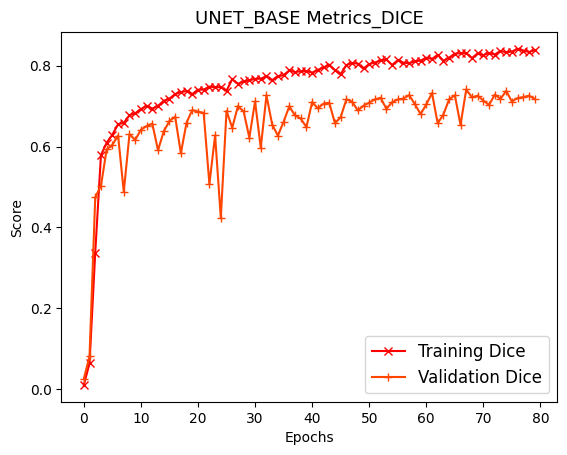

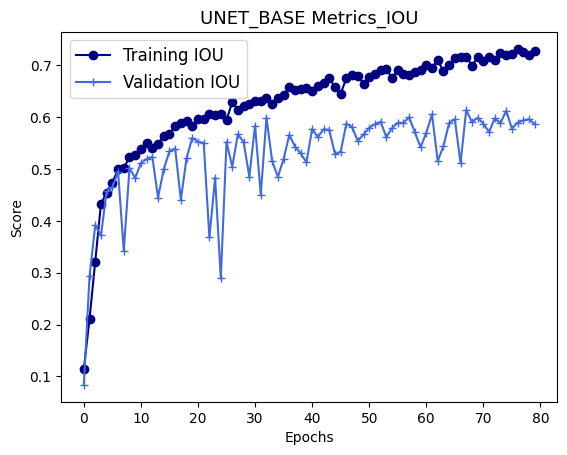

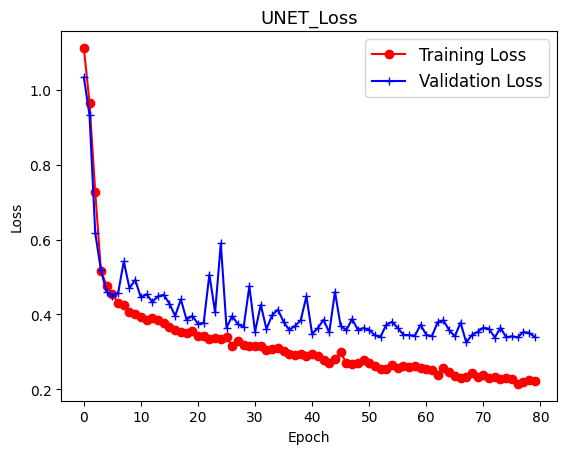

In [49]:
UNET_BASE= rename(UNET_BASE)
plot_metric(UNET_BASE,'UNET_BASE Metrics_DICE')
plot_metric(UNET_BASE,'UNET_BASE Metrics_IOU',False)
plot_loss(UNET_BASE,'UNET_Loss')

# UNET_AUGMENTATION

In [46]:
UNET_AUG.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
73,73.0,0.001,0.300556,0.656185,0.787645,0.345819,0.6054,0.734012


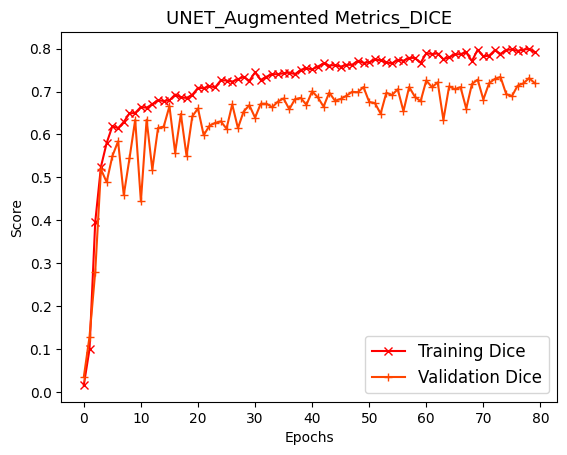

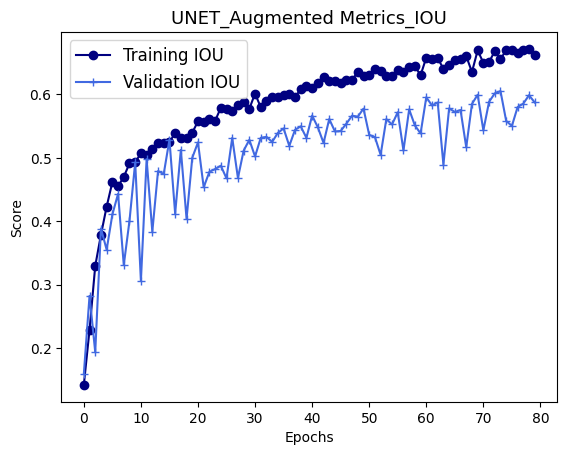

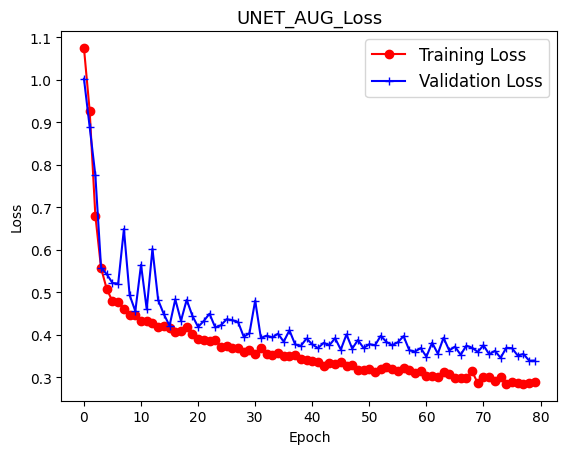

In [47]:
UNET_AUG= rename(UNET_AUG)
plot_metric(UNET_AUG,'UNET_Augmented Metrics_DICE')
plot_metric(UNET_AUG,'UNET_Augmented Metrics_IOU',False)
plot_loss(UNET_AUG,'UNET_AUG_Loss')

# NestedUNET

In [19]:
NestedUNET_Base.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
67,67.0,0.001,0.219145,0.731504,0.841655,0.348584,0.625245,0.747787


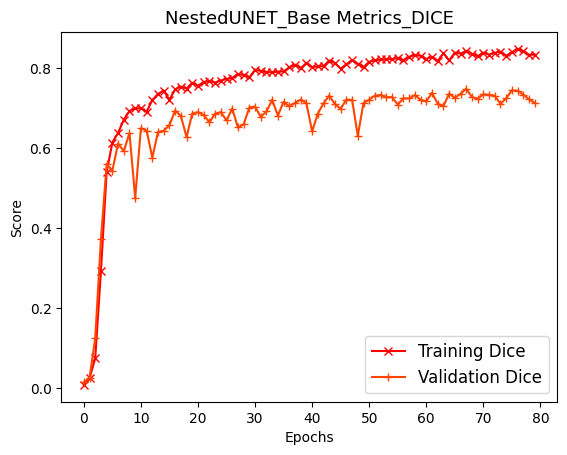

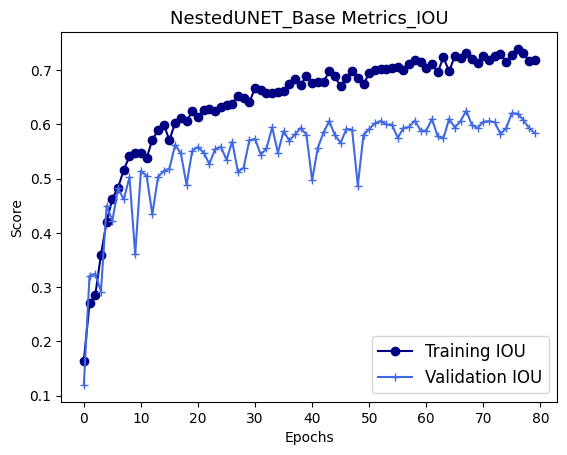

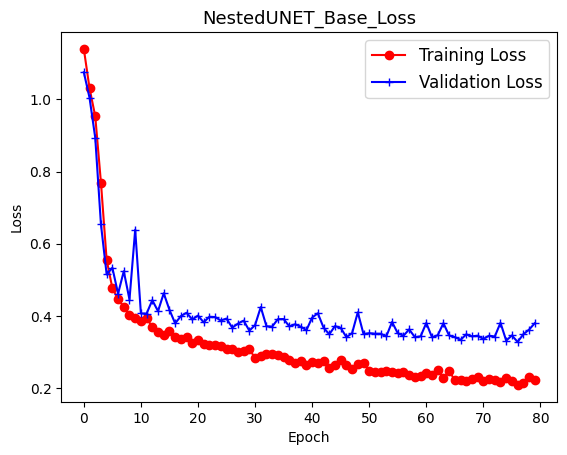

In [20]:
NestedUNET_Base= rename(NestedUNET_Base)
plot_metric(NestedUNET_Base,'NestedUNET_Base Metrics_DICE')
plot_metric(NestedUNET_Base,'NestedUNET_Base Metrics_IOU',False)
plot_loss(NestedUNET_Base,'NestedUNET_Base_Loss')

# NestedUNET Augmented

In [21]:
NestedUNET_Aug.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
9,9.0,0.0001,0.519811,0.558126,0.609815,0.548781,0.517449,0.562939


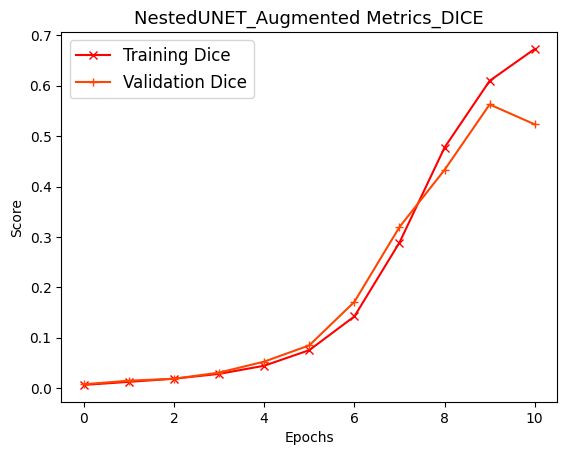

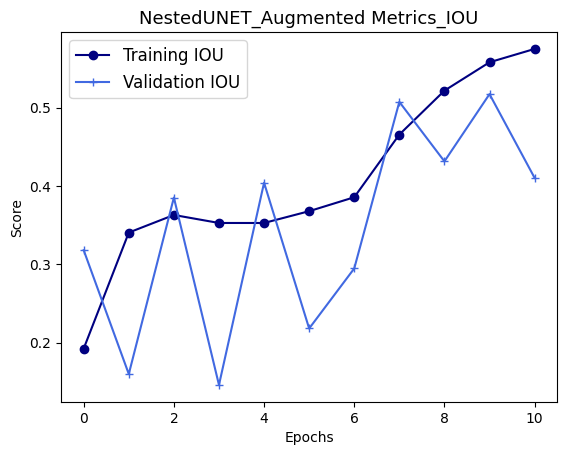

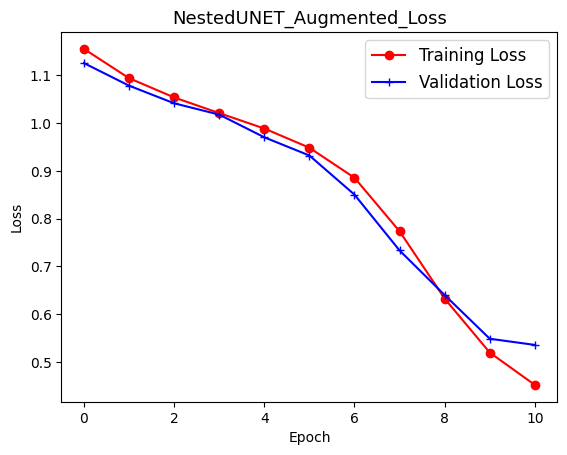

In [38]:
NestedUNET_Aug= rename(NestedUNET_Aug)
plot_metric(NestedUNET_Aug,'NestedUNET_Augmented Metrics_DICE')
plot_metric(NestedUNET_Aug,'NestedUNET_Augmented Metrics_IOU',False)
plot_loss(NestedUNET_Aug,'NestedUNET_Augmented_Loss')

# UNET with augmentation and 1e-4 LR

In [23]:
UNET_AUG_1e_4.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
85,85.0,0.0001,0.192364,0.779178,0.873114,0.309179,0.653357,0.772381


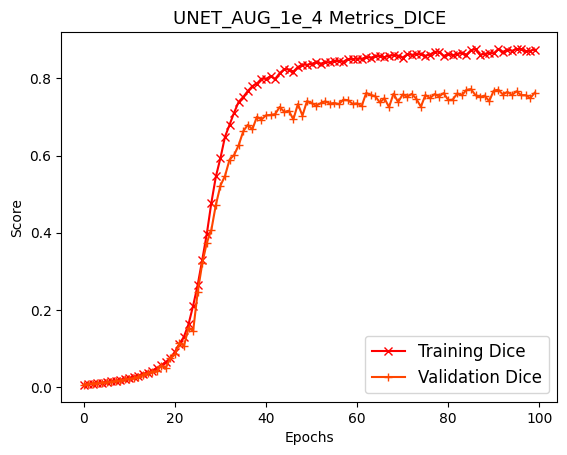

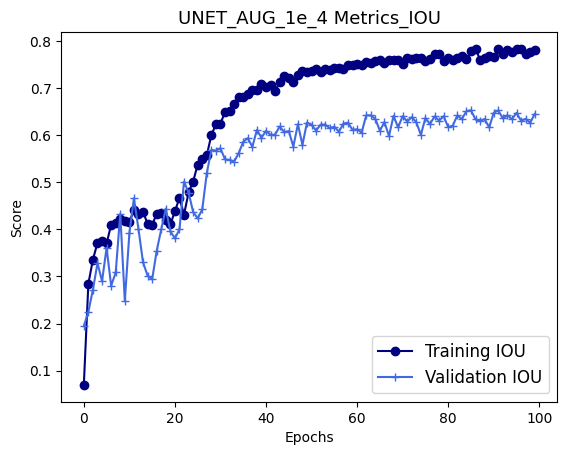

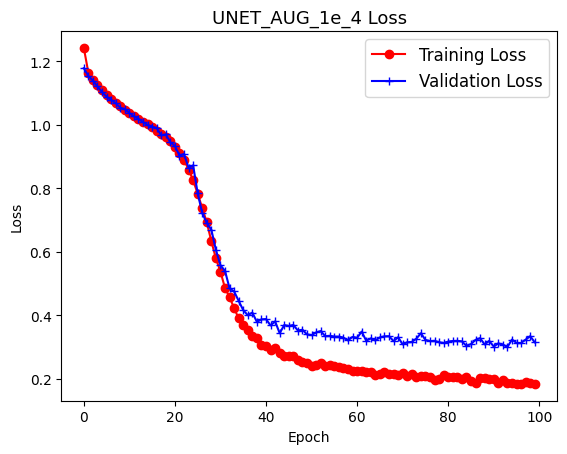

In [37]:
UNET_AUG_1e_4= rename(UNET_AUG_1e_4)
plot_metric(UNET_AUG_1e_4,'UNET_AUG_1e_4 Metrics_DICE')
plot_metric(UNET_AUG_1e_4,'UNET_AUG_1e_4 Metrics_IOU',False)
plot_loss(UNET_AUG_1e_4,'UNET_AUG_1e_4 Loss')

# Attention UNet Base

In [25]:
AttentionUNET_BASE.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
75,75.0,0.0001,0.20546,0.744988,0.850746,0.326683,0.635588,0.755629


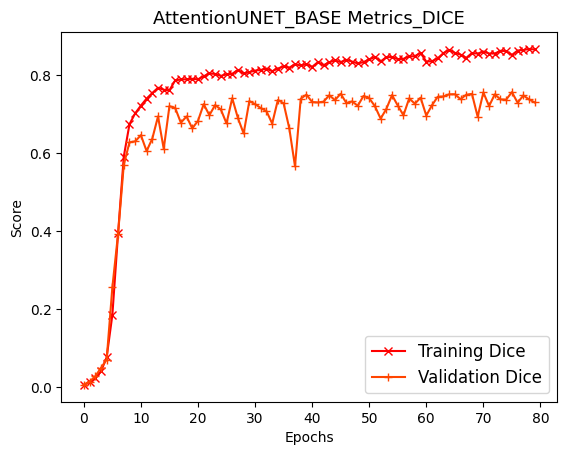

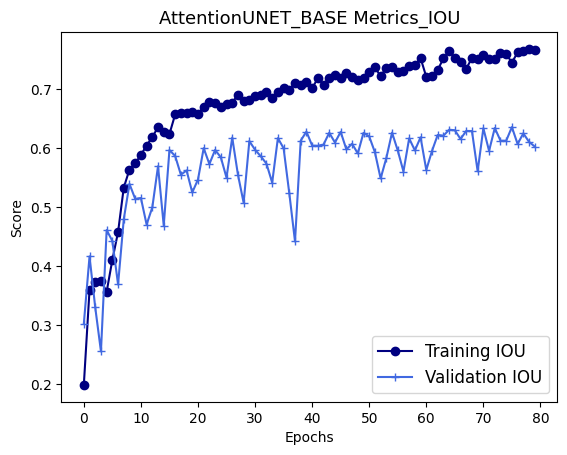

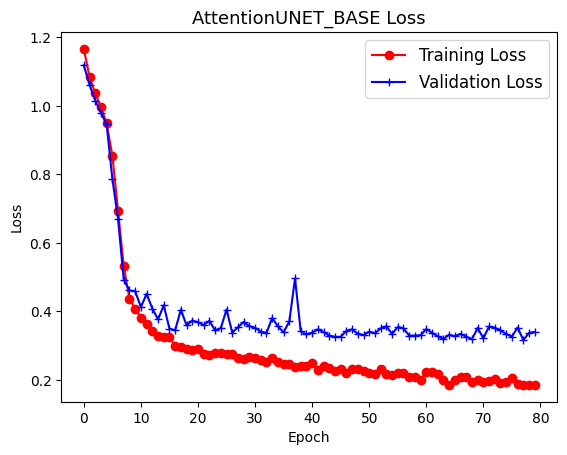

In [31]:
AttentionUNET_BASE= rename(AttentionUNET_BASE)
plot_metric(AttentionUNET_BASE,'AttentionUNET_BASE Metrics_DICE')
plot_metric(AttentionUNET_BASE,'AttentionUNET_BASE Metrics_IOU',False)
plot_loss(AttentionUNET_BASE,'AttentionUNET_BASE Loss')

# Attention UNet AUG

In [29]:
AttentionUNET_AUG.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
77,77.0,0.0001,0.210457,0.735739,0.843,0.336542,0.617389,0.735724


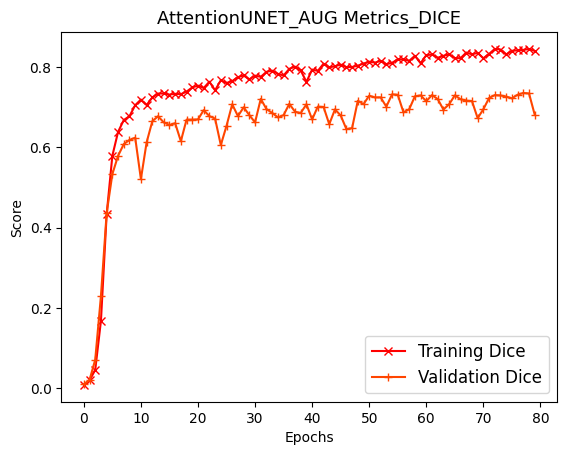

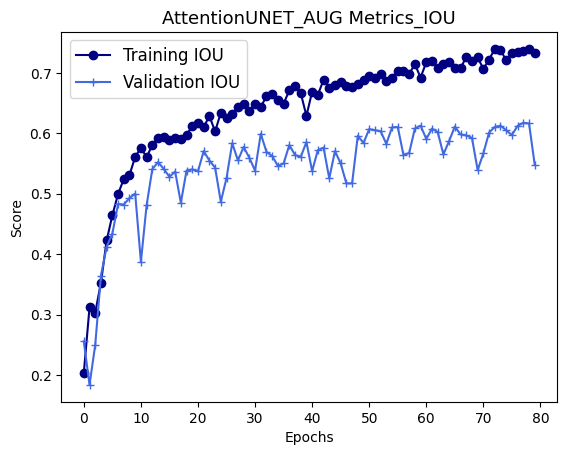

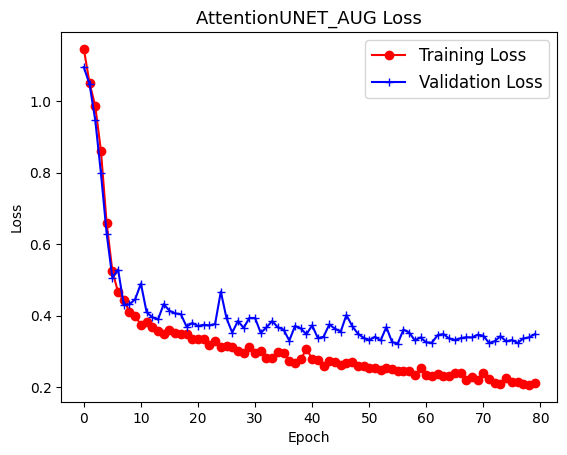

In [32]:
AttentionUNET_AUG= rename(AttentionUNET_AUG)
plot_metric(AttentionUNET_AUG,'AttentionUNET_AUG Metrics_DICE')
plot_metric(AttentionUNET_AUG,'AttentionUNET_AUG Metrics_IOU',False)
plot_loss(AttentionUNET_AUG,'AttentionUNET_AUG Loss')

# UTNet Base

In [26]:
UTNet_Base.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
78,78.0,0.0001,0.146426,0.808019,0.891686,0.26642,0.667594,0.786384


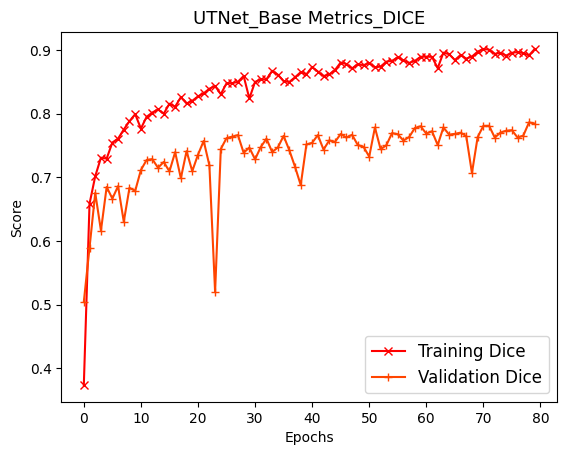

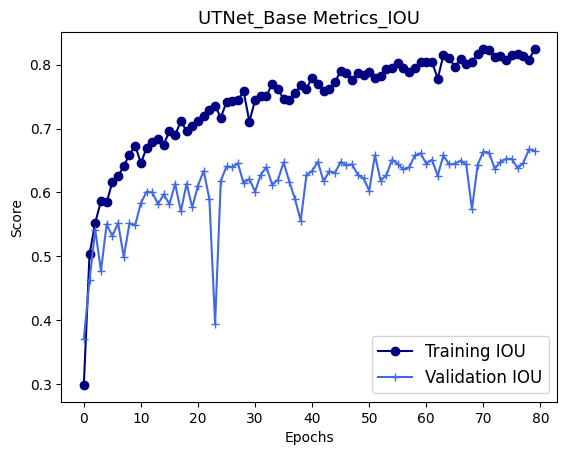

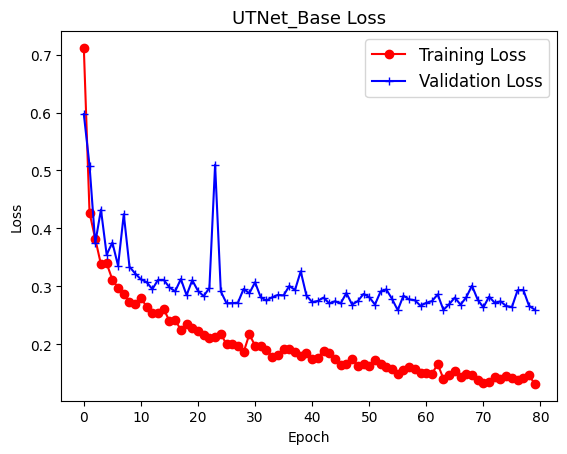

In [35]:
UTNet_Base= rename(UTNet_Base)
plot_metric(UTNet_Base,'UTNet_Base Metrics_DICE')
plot_metric(UTNet_Base,'UTNet_Base Metrics_IOU',False)
plot_loss(UTNet_Base,'UTNet_Base Loss')

# UTNet AUG

In [27]:
UTNet_Aug.sort_values('val_dice',ascending=False).head(1)

,epoch,lr,loss,iou,dice,val_loss,val_iou,val_dice
74,74.0,0.0001,0.129189,0.82507,0.902514,0.261535,0.669411,0.785108


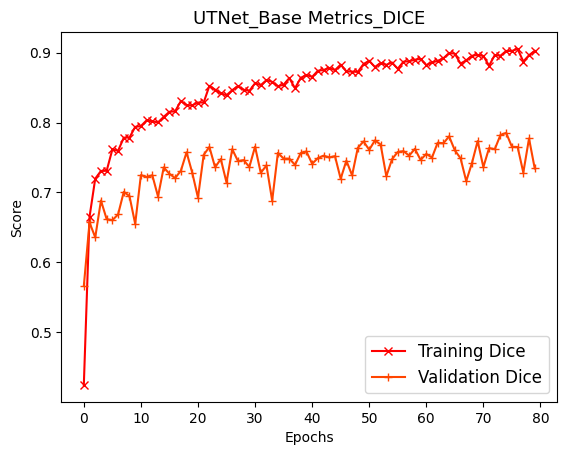

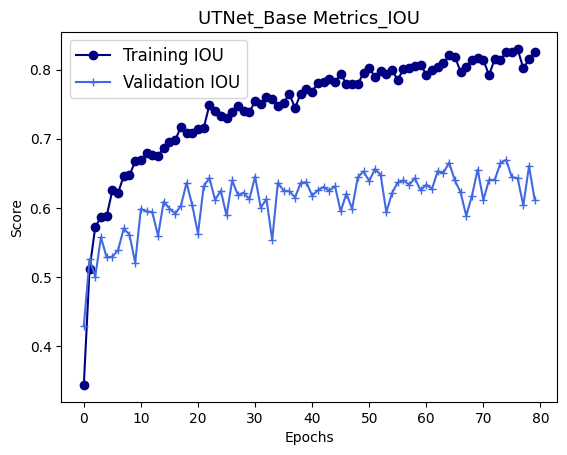

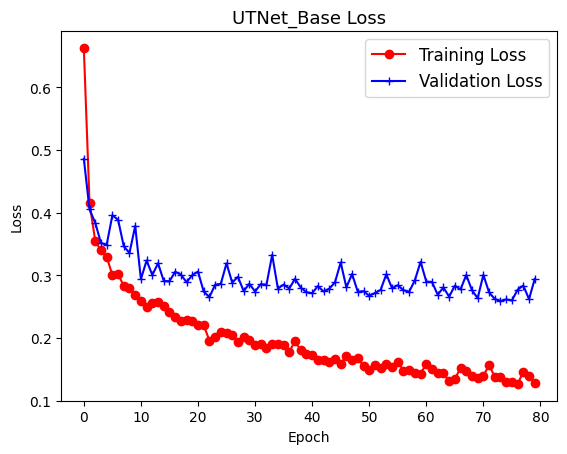

In [33]:
UTNet_Aug= rename(UTNet_Aug)
plot_metric(UTNet_Aug,'UTNet_Base Metrics_DICE')
plot_metric(UTNet_Aug,'UTNet_Base Metrics_IOU',False)
plot_loss(UTNet_Aug,'UTNet_Base Loss')